# Part 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # set seaborn default for plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# fetch and see data
data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
test_data.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [4]:
# check null values in data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked have missing values and we need to fix them

In [5]:
# describe a feature
def describeFeature(data, feature):
    print(data[feature].describe())
    print("\nnull count:")
    print(data['Age'].isnull().value_counts())

In [6]:
# define pie plot
def plotTotal(data, feature):
    categories = data[feature].value_counts()
    print(categories)
    categories.plot.pie(subplots=True)

In [7]:
# plot descriptive feature vs target feature
def plotFeatureToTarget(data, feature, target):
    survived = data[data[target]==1][feature].value_counts()
    dead = data[data[target]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='pie', figsize=(20,20), subplots=True, autopct='%1.0f%%')
    df.plot(kind='bar', figsize=(12,5), stacked=False)

In [8]:
# define histogram plot
def plotHistogram(data, feature, bins=10, kde=False):
    sns.distplot(a=data.dropna()[feature], bins=bins, kde=kde)

In [9]:
def plot2DHistogram(data, f1, f2, bins=10):
    sns.jointplot(x=data[f1], y=data[f2], kind="kde")

In [83]:
# ordinal feature vs target feature / with Factor feature as an option
def plotFactor(data, ordinal_feature, target, hue=None, col=None):
    sns.factorplot(ordinal_feature, target, hue=hue, col=col, data=data)

In [11]:
# plot categorical X continuous features To Categorical Target
def plotViolin(data, categorical_feature, continuous_feature, target):
    sns.violinplot(categorical_feature, continuous_feature, hue=target, data=data, split=True)

In [12]:
# plot continuous feature vs categorical target
def plotFacet(data, feature, target):
    facet = sns.FacetGrid(data, hue=target, aspect=3)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, data[feature].max()))
    facet.add_legend()
    plt.show()

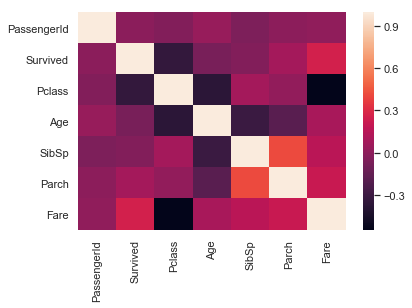

In [13]:
# visualizing correlation between attributes
corr = data.corr()
sns.heatmap(corr) # only appies to non categorical variables

### Types of Features

#### 1. Categorical Feature: Nominal 

categorical feature: a feature that has 1 or more categories and the categories are not sortable in a meaningful way (i.e. male > female ??)

#### 2. Categorical Feature: Ordinal

ordinal feature: categorical feature that has relative ordering for sorting. ex) height category: Tall > Medium > Short

#### 3. Continuous Feature

continuous feature can take values between any 2 points. ex) Fare

male      577
female    314
Name: Sex, dtype: int64


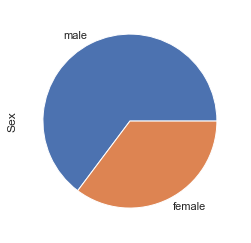

In [14]:
# Analyzing the features,

# first 'Sex' attribute // a Categorical Feature

plotTotal(data, 'Sex')

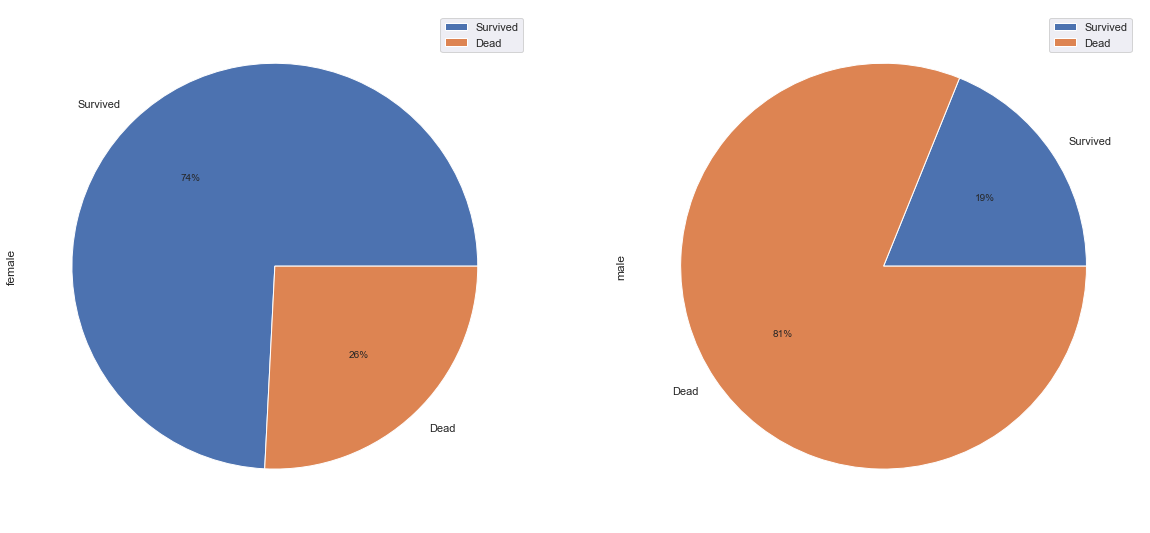

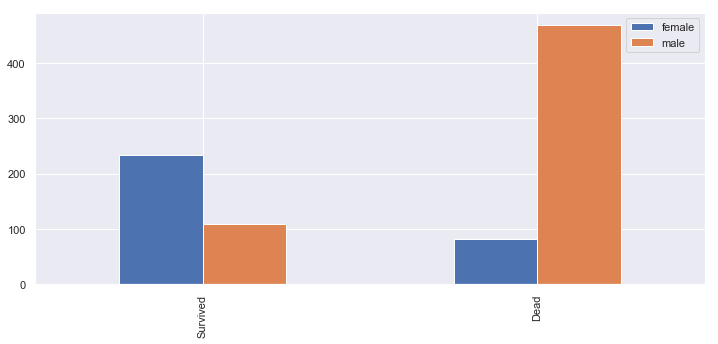

In [15]:
plotFeatureToTarget(data, 'Sex', 'Survived')

### 'Pclass' feature :: ordinal feature

3    491
1    216
2    184
Name: Pclass, dtype: int64


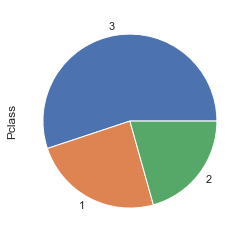

In [16]:
plotTotal(data, 'Pclass')

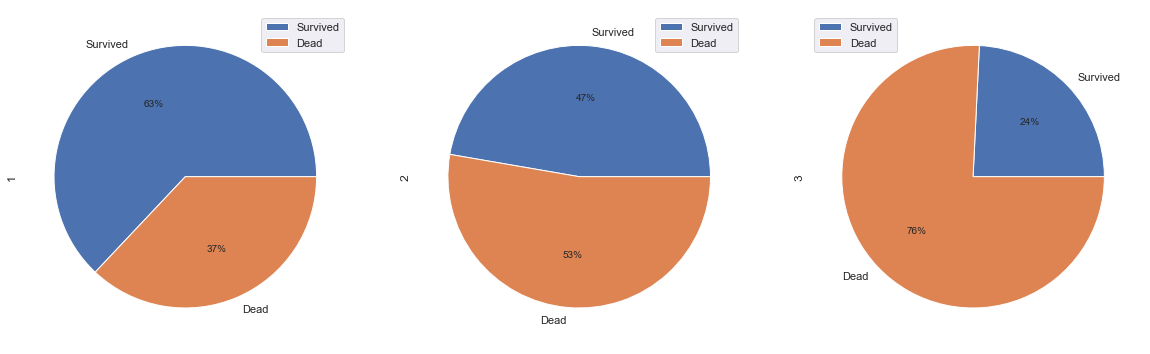

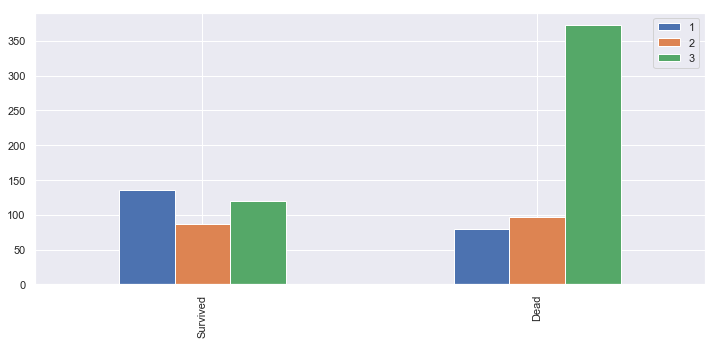

In [17]:
plotFeatureToTarget(data, 'Pclass', 'Survived')

looks like most people are in the Pclass: 3 category.
Survival rate is the highest in Pclass: 1 (63%)
Survival rate is the lowest in Pclass: 3  (24%)

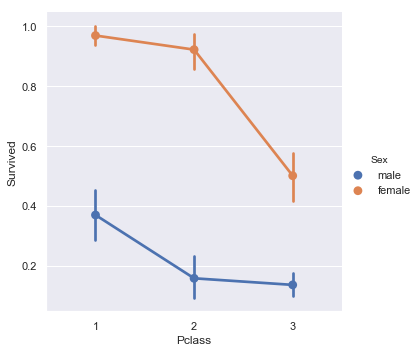

In [18]:
plotOrdinalFeatureToTarget(data, 'Pclass', 'Survived', 'Sex')

from the factorplot, we see that

female in Pclass:1 has 95% survival rate
generally, Pclass looks like a very important feature

### 'Age' feature :: continuous feature

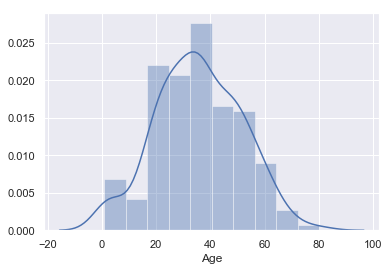

In [19]:
plotHistogram(data, 'Age', kde=True)

In [20]:
describeFeature(data, 'Age')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

null count:
False    714
True     177
Name: Age, dtype: int64


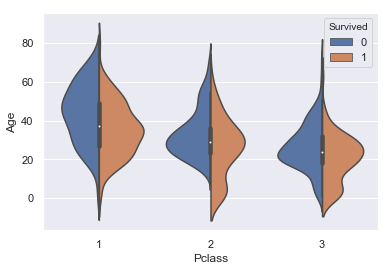

In [21]:
plotViolin(data, 'Pclass', 'Age', 'Survived')

the age factor decreases as Pclass increases from 1-->3

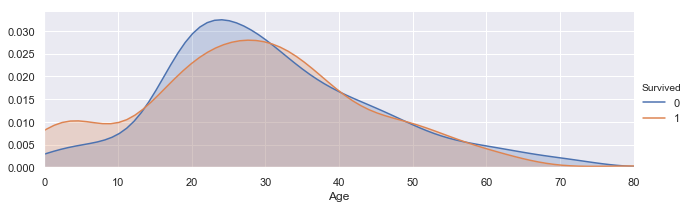

In [22]:
plotFacet(data, 'Age', 'Survived')

observation:
0~14 yrs old had significantly higher survival rate than death rate
14~30 yrs old had higher death rate than survival rate
30+ yrs old had somewhat similar survival vs death rate

In [23]:
describeFeature(data, 'Age')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

null count:
False    714
True     177
Name: Age, dtype: int64


'Age' feature has some significant missing values. We need to fill this up by using some mechanism.

We could use the Title (ex. Mr, Mrs, Miss, etc) to assign average age values to people with those titles.

In [24]:
# before making any changes, we should combine train and test data
train_test_data = [data, test_data]

In [25]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.')

In [26]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


In [27]:
test_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [28]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [29]:
pd.crosstab(data['Title'], data['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


looks like there are some misspelled Titles like Mlle and Mme that stand for Miss. we can replace these.

also, we can replace Catp, Col --> Mr, because we know they are male

In [30]:
# doing some meaningful replacement
for dataset in train_test_data:
    dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Other'],inplace=True)

In [31]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [32]:
data.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [33]:
# filling in the missing ages
for dataset in train_test_data:
    dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'), inplace=True)

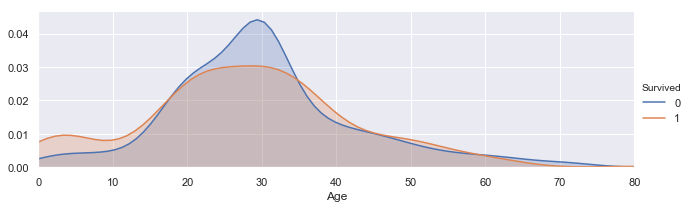

In [34]:
plotFacet(data, 'Age', 'Survived')

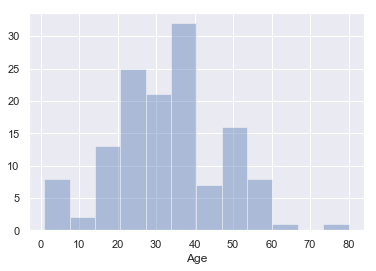

In [35]:
plotHistogram(data[data['Survived']==1], 'Age', bins=12)

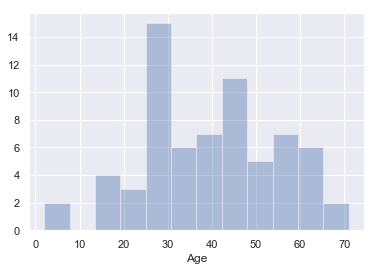

In [36]:
plotHistogram(data[data['Survived']==0], 'Age', bins=12)

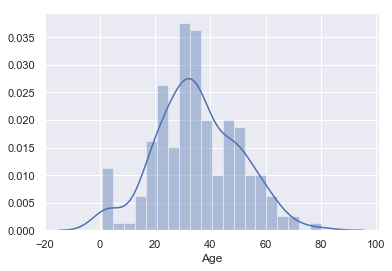

In [37]:
plotHistogram(data, 'Age', bins=20, kde=True)

In [38]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

### 'Embarked' feature :: categorical value

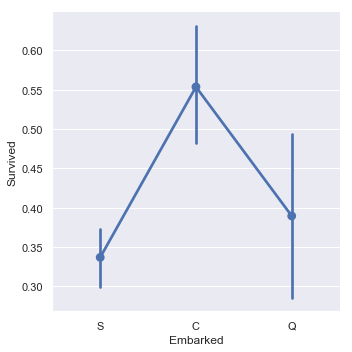

In [39]:
plotOrdinalFeatureToTarget(data, 'Embarked', 'Survived')

Looks like people who embarked from 'C' show the highest survival rate. would this be because many of the people from 'C' are rich and used the first Pclass?

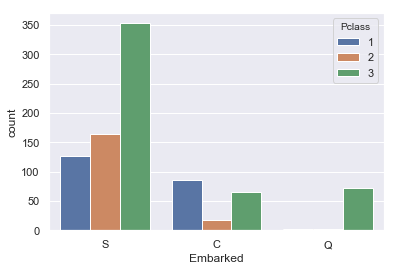

In [40]:
sns.countplot('Embarked', data=data, hue='Pclass')

observations: 
Most people onboarded from 'S'

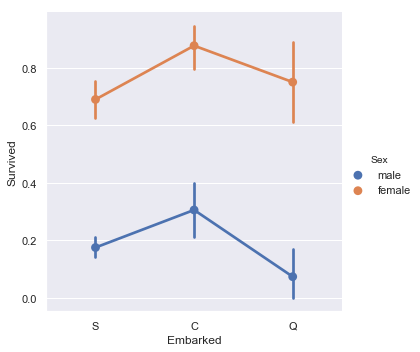

In [41]:
plotOrdinalFeatureToTarget(data, 'Embarked', 'Survived', 'Sex')

Filling in NaNs for Embarked

In [42]:
data['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [43]:
data['Embarked'].fillna('S', inplace=True)

In [44]:
data['Embarked'].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

In [45]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

### next, 'SibSp' feature :: discrete feature (ordinal)

In [46]:
describeFeature(data, 'SibSp')

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

null count:
False    891
Name: Age, dtype: int64


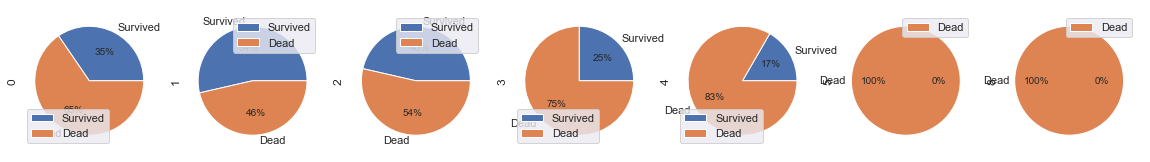

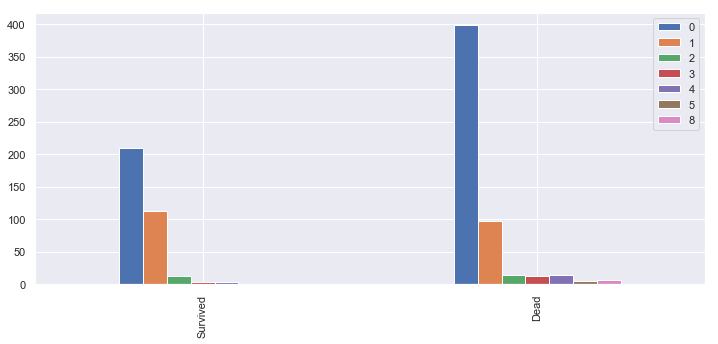

In [47]:
plotFeatureToTarget(data, 'SibSp', 'Survived')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


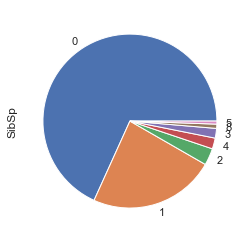

In [48]:
plotTotal(data, 'SibSp')

In [49]:
pd.crosstab(data['SibSp'], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


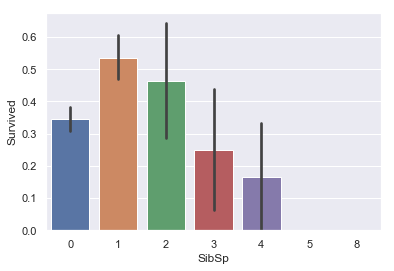

In [50]:
sns.barplot('SibSp', 'Survived', data=data)

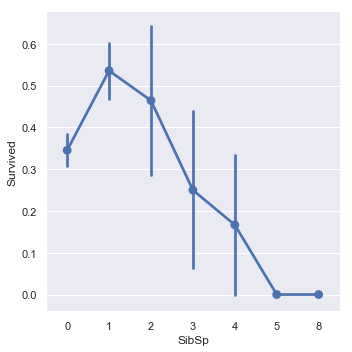

In [51]:
sns.factorplot('SibSp', 'Survived', data=data)

Survival rate is highest when SibSp=1 > 2 > 0 > 3 > 4 > ..
it decreases, pClass 5,6 have 0 percent survival rate, probably b/c of Pclass

### Parch: Nominal feature

In [52]:
describeFeature(data,'Parch')

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

null count:
False    891
Name: Age, dtype: int64


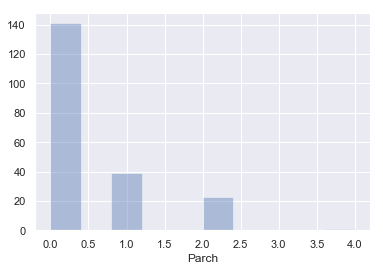

In [53]:
plotHistogram(data, 'Parch')

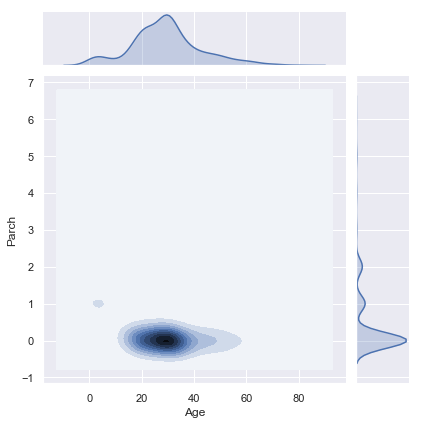

In [54]:
plot2DHistogram(data, 'Age', 'Parch')

looks like Parch=1 only applies to Age group 0~5.

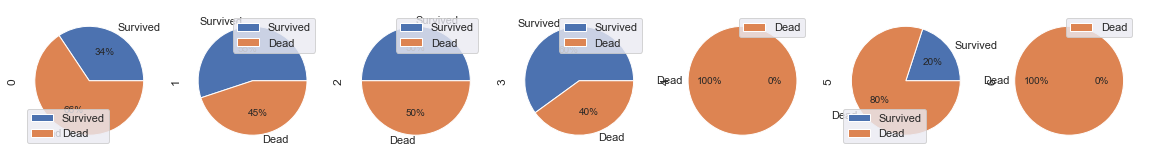

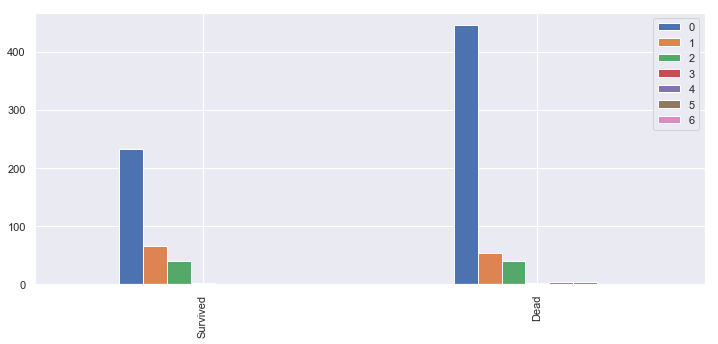

In [55]:
plotFeatureToTarget(data, "Parch", "Survived")

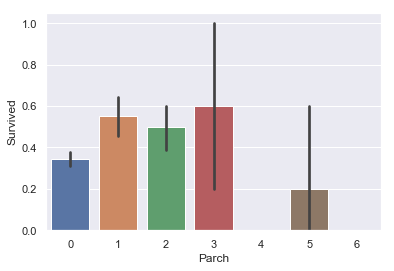

In [56]:
sns.barplot('Parch', 'Survived', data=data)

survival rate is highest with Parch = 3 > 1 > 2 > 0 > 5 > 4 == 6

### Fare :: continuous feature

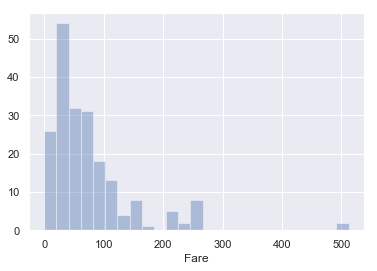

In [57]:
plotHistogram(data, 'Fare', bins=25)

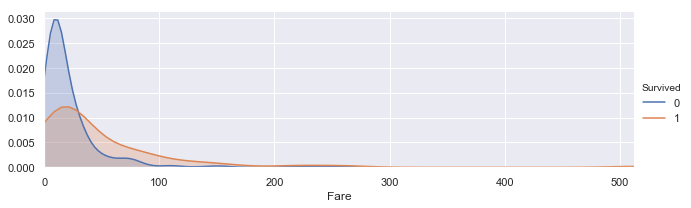

In [58]:
plotFacet(data, 'Fare', 'Survived')

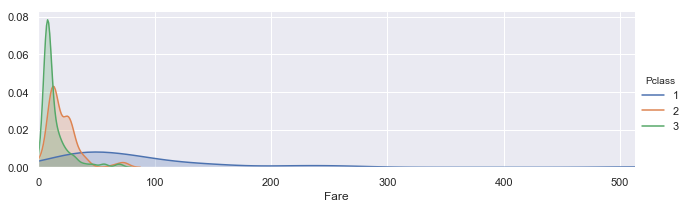

In [59]:
plotFacet(data, 'Fare', 'Pclass')

Observations in a nutshell

Sex: women is more likely to survive than men
Pclass: higher pclass shows higher survival rate
Age: children are likely to survive, 16~35 ish adults died a lot
Embarked: in terms of ratio, people who onboarded from 'C' are likely to have
pclass 1, thus the survival rate is high.
Parch+SibSp: having 1~2 SibSp and having 1~3 Parch shows higher chance of survival,
compared to traveling alone or as a large family.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [61]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


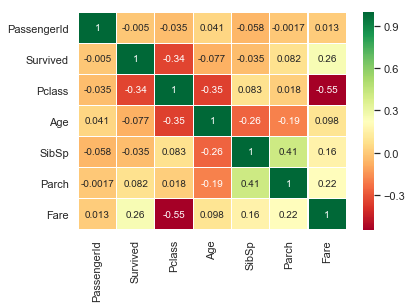

In [62]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

Heatmap interpretation

positive correlation: increase in A --> increase in B. Thus, they hold similar information
negative correlation: increase in A --> decrease in B. they hold negative similarity.

we should try to remove redundancy.

2 features that show highest correlation are SibSp and Parch. let's do something.

## Part 2: Feature Engineering and Data Cleaning

'Age' is a continuous feature. we need to convert this into categorical value
either by binning or by normaliszation.

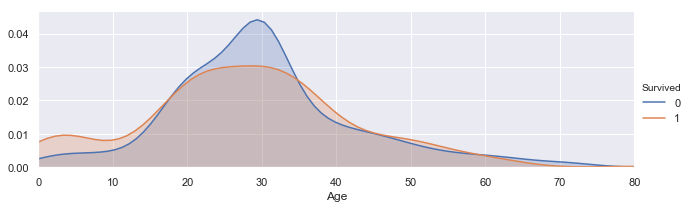

In [63]:
plotFacet(data, 'Age', 'Survived')

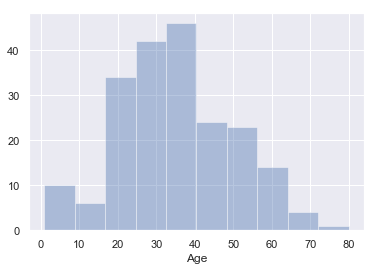

In [64]:
plotHistogram(data, 'Age')

In [65]:
data['Age'].describe()

count    891.000000
mean      29.391886
std       13.240506
min        0.420000
25%       21.500000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [67]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


In [68]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4

In [69]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [70]:
data['Age'].value_counts()

1.0    502
2.0    205
0.0    104
3.0     69
4.0     11
Name: Age, dtype: int64

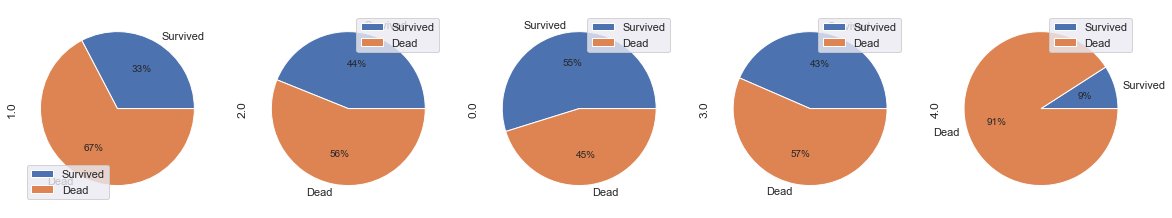

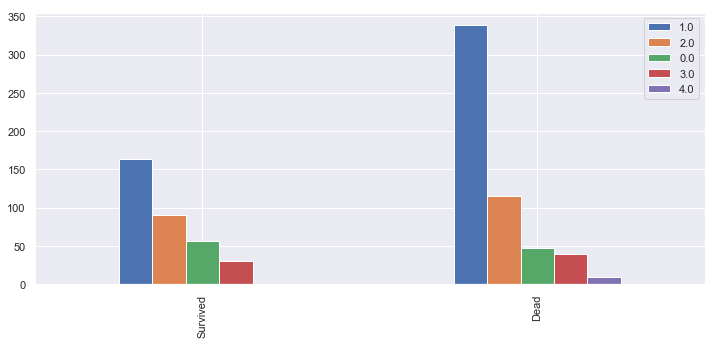

In [89]:
plotFeatureToTarget(data, 'Age', 'Survived')

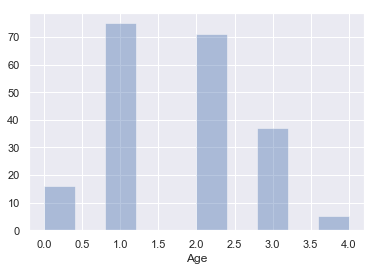

In [71]:
plotHistogram(data, 'Age')

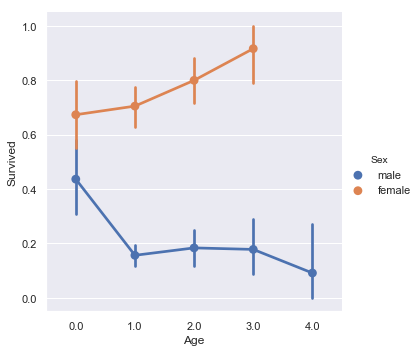

In [84]:
plotFactor(data, 'Age', 'Survived', hue='Sex')

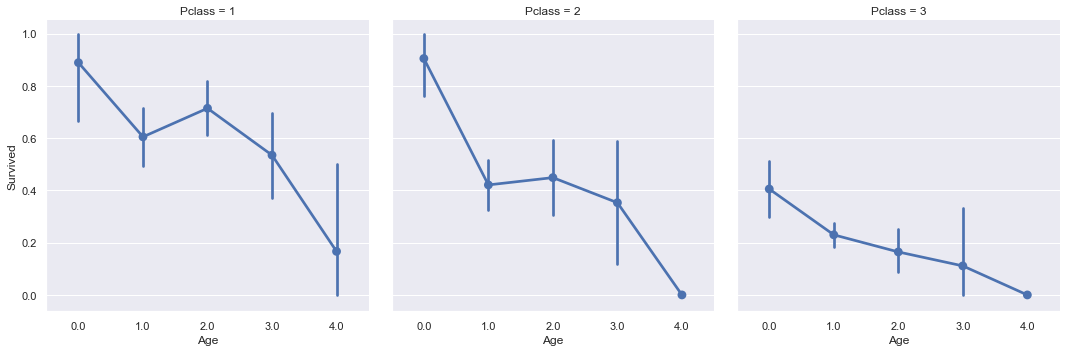

In [85]:
plotFactor(data, 'Age', 'Survived', col='Pclass')

In [91]:
for dataset in train_test_data:
    dataset.drop(['Name','Ticket'], axis=1, inplace=True)

In [93]:
for dataset in train_test_data:
    dataset['Sex_Group'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [95]:
for dataset in train_test_data:
    dataset.drop('Sex', axis=1, inplace=True)

In [98]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [99]:
test_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [103]:
# label title
for dataset in train_test_data:
    dataset['Title_Group'] = dataset['Title'].map({
        'Mr': 0,
        'Mrs': 1,
        'Miss': 2,
        'Master': 3,
        'Other': 4
    })
    dataset.drop('Title', axis=1, inplace=True)

In [105]:
# drop Cabin b/c a lot of NaN values
for dataset in train_test_data:
    dataset.drop('Cabin', axis=1, inplace=True)

In [107]:
for dataset in train_test_data:
    dataset['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)

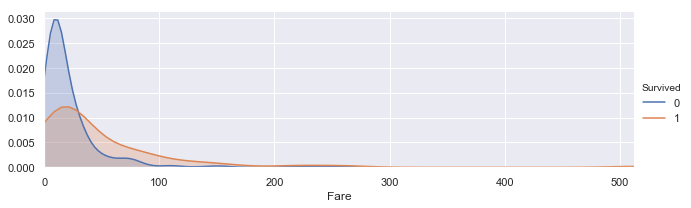

In [110]:
plotFacet(data, 'Fare', 'Survived')

In [112]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3
    

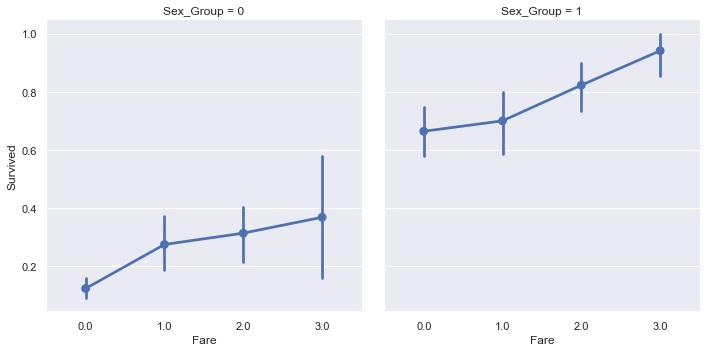

In [115]:
plotFactor(data, 'Fare', 'Survived', col='Sex_Group')

In [117]:
for dataset in train_test_data:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']

In [121]:
for dataset in train_test_data:
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [123]:
for dataset in train_test_data:
    dataset.drop('PassengerId', axis=1, inplace=True)

In [125]:
dataset.head(20)

,Pclass,Age,Fare,Embarked,Sex_Group,Title_Group,Family
0,3,2.0,0.0,2,0,0,0
1,3,2.0,0.0,0,1,1,1
2,2,3.0,0.0,2,0,0,0
3,3,1.0,0.0,0,0,0,0
4,3,1.0,0.0,0,1,1,2
5,3,0.0,0.0,0,0,0,0
6,3,1.0,0.0,2,1,2,0
7,2,1.0,1.0,0,0,0,2
8,3,1.0,0.0,1,1,1,0
9,3,1.0,1.0,0,0,0,2
